In [1]:
import pandas as pd

# load dataset
df = pd.read_csv("adult.csv")

# see first 5 rows
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df.shape

(48842, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Features:")
print(numerical_cols)

print("\nCategorical Features:")
print(categorical_cols)

Numerical Features:
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Categorical Features:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [5]:
X = df.drop("income", axis=1)
y = df["income"]

print(X.shape, y.shape)

(48842, 14) (48842,)


In [6]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()

X['education_encoded'] = le_education.fit_transform(X['education'])

# drop original education column
X = X.drop('education', axis=1)

X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,education_encoded
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,11
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,7
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,15
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,15


In [7]:
le_income = LabelEncoder()
y_encoded = le_income.fit_transform(y)

y_encoded[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [8]:
X.select_dtypes(include='object').columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')

In [9]:
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,11,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,7,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,15,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,15,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
print("Before encoding:", X.shape)
print("After encoding:", X_encoded.shape)

Before encoding: (48842, 14)
After encoding: (48842, 86)


In [11]:
from sklearn.preprocessing import StandardScaler

num_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_encoded'],
      dtype='object')

In [12]:
scaler = StandardScaler()

X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

X_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,-2.397350,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.183660,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-0.848744,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,1.216063,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,1.216063,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
X_encoded[num_cols].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_encoded
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,2.281092e-16,-5.848208e-17,-9.208746e-17,1.047440e-17,-1.018345e-17,4.466169e-17,-5.804565e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00,-2.655451e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02,-3.325424e-01
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02,1.836595e-01
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01,4.417605e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00,1.216063e+00


In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
X_encoded[num_cols].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_encoded
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,2.281092e-16,-5.848208e-17,-9.208746e-17,1.047440e-17,-1.018345e-17,4.466169e-17,-5.804565e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00,-2.655451e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02,-3.325424e-01
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02,1.836595e-01
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01,4.417605e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00,1.216063e+00


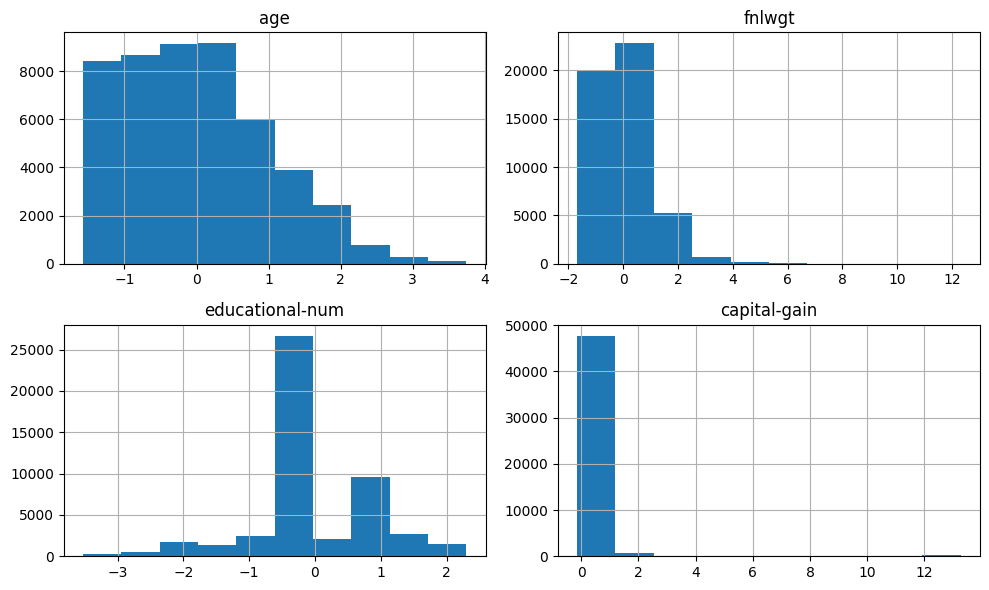

In [16]:
import matplotlib.pyplot as plt

X_encoded[num_cols[:4]].hist(figsize=(10,6))
plt.tight_layout()

Scaling improves convergence speed, model stability, and ensures fair feature contribution, especially for distance and gradient-based algorithms.

In [17]:
processed_df = X_encoded.copy()
processed_df['income'] = y_encoded

processed_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,-2.397350,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.183660,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-0.848744,False,True,False,...,False,False,False,False,False,False,True,False,False,1
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,1.216063,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,1.216063,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [18]:
processed_df.to_csv("adult_income_processed.csv", index=False)